# Malware classify With Machine Learning

## Install library

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

## 1. Import thư viện

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Load Dataset

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data = data.drop('packer_type',axis=1)
data

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,304,5,0,0,1,...,1,5,0,1,0,0,288240,6.614556,0,0
1,144,3,4,65535,184,128,3,0,0,1,...,1,3,0,1,0,0,126736,5.861262,0,0
2,144,3,4,65535,184,208,3,0,1,1,...,1,3,0,1,0,0,139264,6.286703,0,0
3,144,3,4,65535,184,128,3,0,0,1,...,1,3,0,1,0,0,30672,6.635395,0,0
4,144,3,4,65535,184,232,5,0,0,1,...,1,5,0,0,0,0,37376,5.787681,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,80,3,0,65535,0,124,4,0,1,1,...,1,4,0,0,0,0,375808,7.877891,0,1
9404,144,3,4,65535,184,232,4,0,1,1,...,1,4,0,1,0,0,454656,7.410449,0,1
9405,144,3,4,65535,184,64,4,0,1,1,...,1,4,0,1,0,0,402432,7.975708,0,1
9406,144,3,4,65535,184,208,4,0,1,1,...,1,4,0,1,0,0,425984,7.475287,0,1


In [5]:
data.groupby(data['class']).size()

class
0     441
1    8967
dtype: int64

### Tổng 9.408 data:
- 441 là mẫu an toàn
- 8967 là malware.

In [6]:
features = data.iloc[:, :-1].values

### Lấy ra cột label malware để so sánh

In [7]:
ifMalware = data.iloc[:,-1].values

### Sử dụng 75% dataset để train, 25% để test

In [8]:
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)

## 3. Load model

### 3.1 - Decision Tree

In [9]:
dtModel = DecisionTreeClassifier()
dtModel.fit(features_train, ifMalware_train)
dtPredict = dtModel.predict(features_test)
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != dtPredict).sum(),features_test.shape[0]))

Số lượng test có nhãn sai (mislabeled): 9 / 2352 


In [10]:
successRate = 100 * f1_score(ifMalware_test, dtPredict, average='micro')

In [11]:
print(f"Tỉ lệ thành công model Decision Tree: {successRate}%")

Tỉ lệ thành công model Decision Tree: 99.61734693877551%


### 3.2 - Random Forest

In [12]:
rfModel = RandomForestClassifier()
rfModel.fit(features_train, ifMalware_train)
rfPredict = rfModel.predict(features_test)

In [13]:
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != rfPredict).sum(),features_test.shape[0]))

Số lượng test có nhãn sai (mislabeled): 6 / 2352 


In [14]:
successRate = 100 * f1_score(ifMalware_test, rfPredict, average='micro')

In [15]:
print(f"Tỉ lệ thành công model Random forest: {successRate}%")

Tỉ lệ thành công model Random forest: 99.74489795918367%


### 3.3 -  KNN (K Nearest Neighbors)

In [16]:
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(features_train, ifMalware_train)
knPredict = knModel.predict(features_test)

In [17]:
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != knPredict).sum(),features_test.shape[0]))

Số lượng test có nhãn sai (mislabeled): 23 / 2352 


In [18]:
successRate = 100 * f1_score(ifMalware_test, knPredict, average='micro')

In [19]:
print(f"Tỉ lệ thành công model KNN: {successRate}%")

Tỉ lệ thành công model KNN: 99.02210884353741%


## 4.1 Visualization  - Decision tree

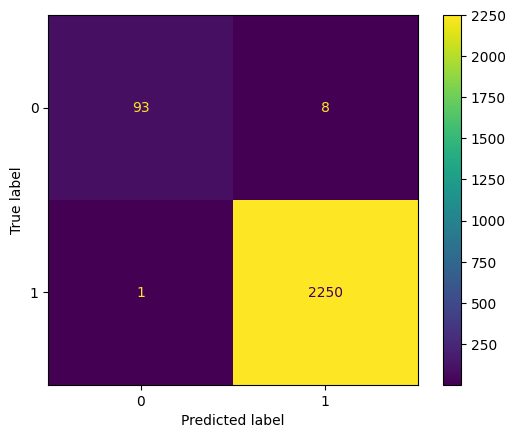

In [20]:
ConfusionMatrixDisplay.from_estimator(dtModel,features_test,ifMalware_test)

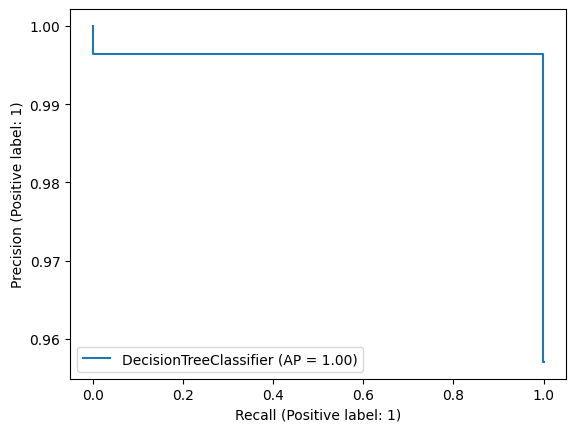

In [21]:
PrecisionRecallDisplay.from_estimator(dtModel,features_test,ifMalware_test)

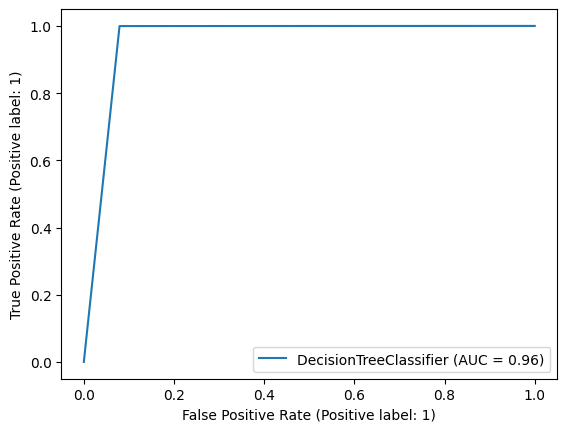

In [22]:
RocCurveDisplay.from_estimator(dtModel,features_test,ifMalware_test)

## 4.1 Visualization  - Random Forest

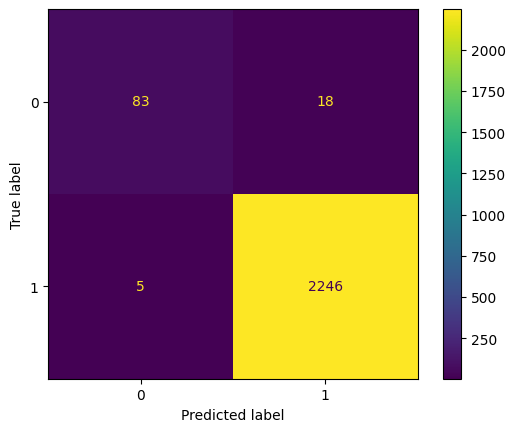

In [23]:
ConfusionMatrixDisplay.from_estimator(knModel,features_test,ifMalware_test)

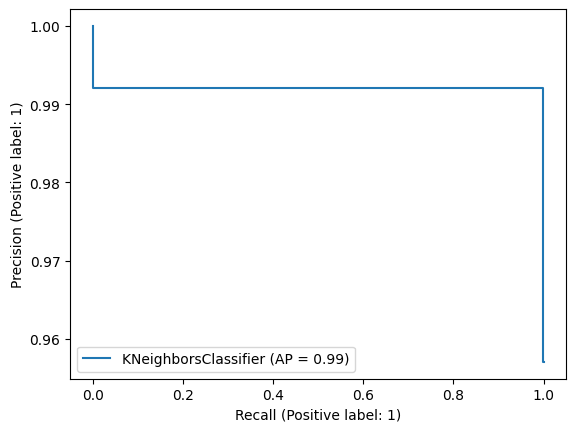

In [24]:
PrecisionRecallDisplay.from_estimator(knModel,features_test,ifMalware_test)

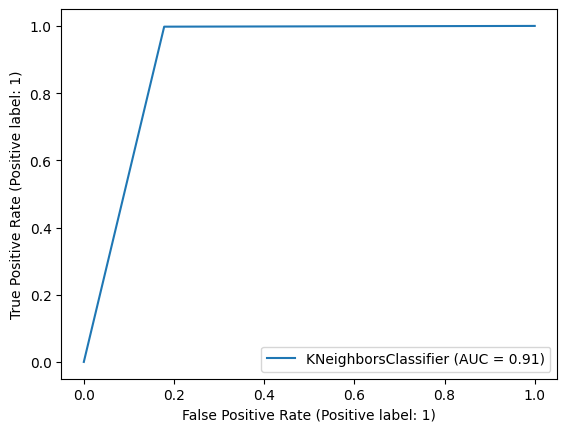

In [25]:
RocCurveDisplay.from_estimator(knModel,features_test,ifMalware_test)

## 4.1 Visualization  - KNN (K Nearest Neighbors)

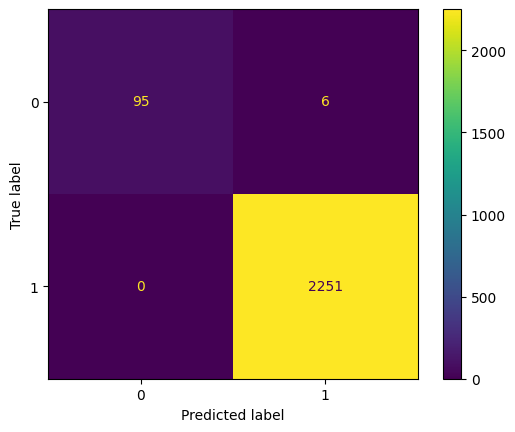

In [26]:
ConfusionMatrixDisplay.from_estimator(rfModel,features_test,ifMalware_test)

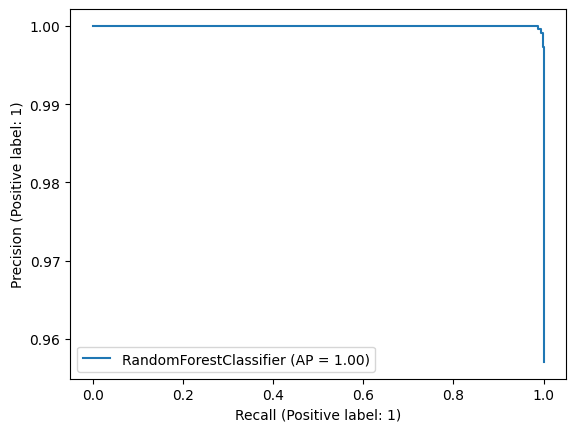

In [27]:
PrecisionRecallDisplay.from_estimator(rfModel,features_test,ifMalware_test)

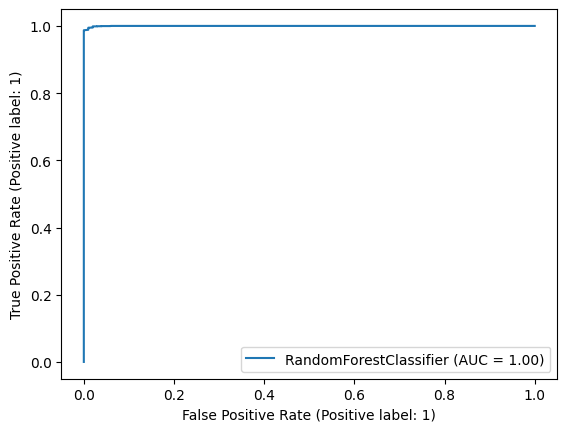

In [28]:
RocCurveDisplay.from_estimator(rfModel,features_test,ifMalware_test)

## 5. Export Model

In [29]:
import joblib

joblib.dump(dtModel, 'decision_tree_model.pkl')
joblib.dump(knModel, 'random_forest_model.pkl')
joblib.dump(rfModel, 'K_Nearest_Neighbors_model.pkl')

['K_Nearest_Neighbors_model.pkl']

## 6. Predict

In [30]:


y_pred = loaded_model.predict(X_test)

NameError: name 'loaded_model' is not defined